In [1]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

In [2]:
t0 = time.time()
data_dir = '../data/'
file = 'df_sales.csv'
df_sales = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  0.9147050380706787


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_postage = \
df_sales[(df_sales['StockCode'] == 'POST') | (df_sales['StockCode'] == 'DOT')]
print('df_postage.shape = ', df_postage.shape)

df_postage.shape =  (1832, 9)


In [11]:
df_postage.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,54.00
377,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,15.00
1112,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany,18.00
1801,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77
3005,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49
4991,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.00,12738.0,Germany,18.00
5171,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.00,12686.0,France,18.00
5233,536858,POST,POSTAGE,2,2010-12-03 10:36:00,40.00,13520.0,Switzerland,80.00
5277,536861,POST,POSTAGE,3,2010-12-03 10:44:00,18.00,12427.0,Germany,54.00
5358,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43


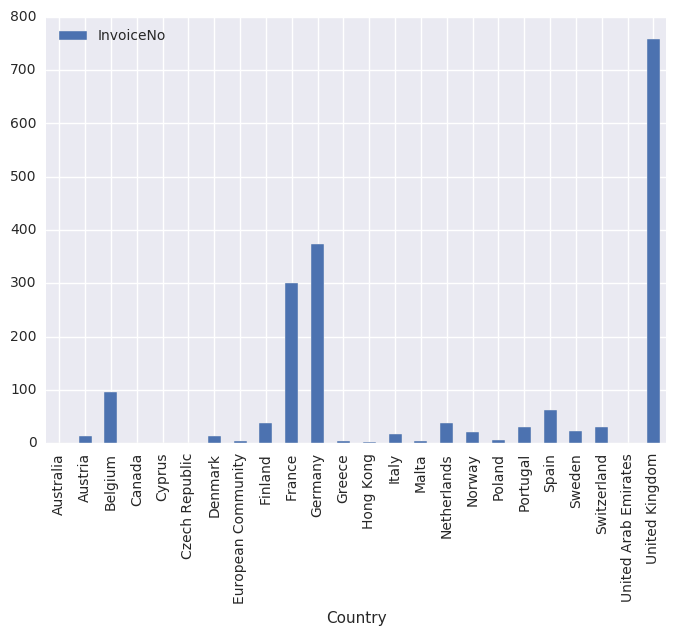

In [9]:
pd.DataFrame(df_postage.groupby('Country')['InvoiceNo'].nunique()).plot(kind='bar')
plt.show()


# NOTE:
# UK で発生している送料のトランザクションが 1番大きい。

In [16]:
df_postage_uk = \
df_postage[df_postage['Country'] == 'United Kingdom']
print('df_postage_uk, CustomerID is NaN =', df_postage_uk['CustomerID'].isnull().sum())
print('df_postage_uk, CustomerID is not NaN =', df_postage_uk['CustomerID'].notnull().sum())

# NOTE:
# ほとんどが　CustomerID = NaN のため、送料についてこれ以上考えてもしかたなさそうにもみえる。

df_postage_uk, CustomerID is NaN = 715
df_postage_uk, CustomerID is not NaN = 43
